In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('seaborn-v0_8-darkgrid')

In [2]:
#load datasets
trader_df = pd.read_csv('/content/historical_data.csv')
sentiment_df = pd.read_csv('/content/fear_greed_index.csv')

print('Trader Data Shape:', trader_df.shape)
print('Sentiment Data Shape:', sentiment_df.shape)
trader_df.head()

Trader Data Shape: (211224, 16)
Sentiment Data Shape: (2644, 4)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [6]:
#data cleaning
trader_df.dropna(inplace=True)
sentiment_df.dropna(inplace=True)
trader_df['time'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
print('Data cleaned successfully.')

Data cleaned successfully.


/tmp/ipython-input-1969009363.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sentiment_df, x='classification', palette='cool')


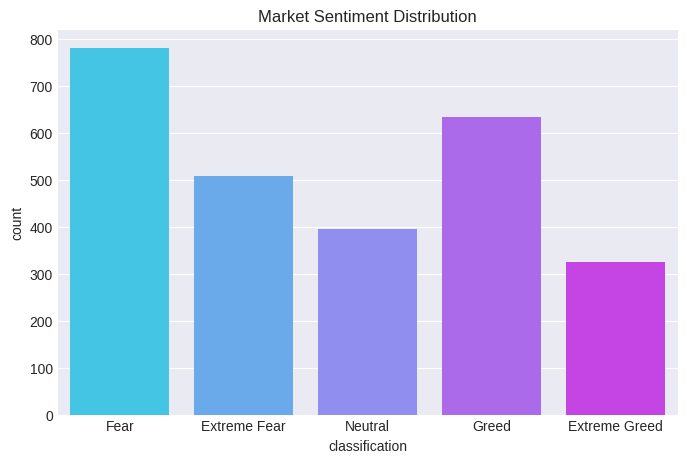

In [9]:
#EDA
os.makedirs('outputs', exist_ok=True)
plt.figure(figsize=(8,5))
sns.countplot(data=sentiment_df, x='classification', palette='cool')
plt.title('Market Sentiment Distribution')
plt.savefig('outputs/sentiment_distribution.png')
plt.show()

/tmp/ipython-input-3114945237.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='classification', y='Closed PnL', palette='viridis')


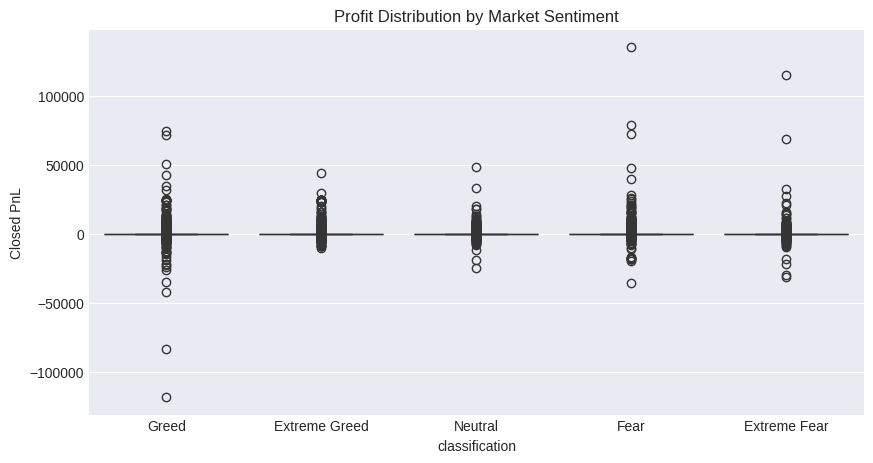

In [11]:
merged_df = pd.merge_asof(
    trader_df.sort_values('time'),
    sentiment_df.sort_values('date'),
    left_on='time', right_on='date'
)

plt.figure(figsize=(10,5))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL', palette='viridis')
plt.title('Profit Distribution by Market Sentiment')
plt.savefig('outputs/profit_by_sentiment.png')
plt.show()